# Chernoff bounds

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
%config InlineBackend.figure_format = "retina"

**Theorem 2.16** (Additive Chernoff bound)  
Assume that $X\in[0, 1]$. Then, for all $\epsilon > 0$,
$$
\begin{aligned}
    \text{Pr}\left(\bar X_N \geq \mu + \epsilon \right) &\leq \exp\left( -2N\epsilon^2 \right)\\
    \text{Pr}\left(\bar X_N \leq \mu - \epsilon \right) &\leq \exp\left( -2N\epsilon^2 \right)\\
\end{aligned}
$$


**Theorem 2.17** ([Refined] additive Chernoff bound)  
$$
\begin{aligned}
    \text{Pr}\left( \bar X_N \geq \mu + \epsilon \right) &\leq \exp(-N \cdot \text{KL}(\mu + \epsilon || \mu))\\
    \text{Pr}\left( \bar X_N \geq \mu - \epsilon \right) &\leq \exp(-N \cdot \text{KL}(\mu - \epsilon || \mu))
\end{aligned}
$$

with
$$
    \text{KL}(z || \mu) = z\log\left(\frac{z}{\mu}\right) + (1 - z)\log\left(\frac{1 - z}{1 - \mu}\right)
$$

In [24]:
def klb(z, mu):
    return z * np.log(z / mu) + (1 - z) * np.log((1 - z) / (1 - mu))

In [33]:
N = 10
eps_values = np.linspace(0, 0.5, 101)[1:]
hoeff1 = -2 * eps_values

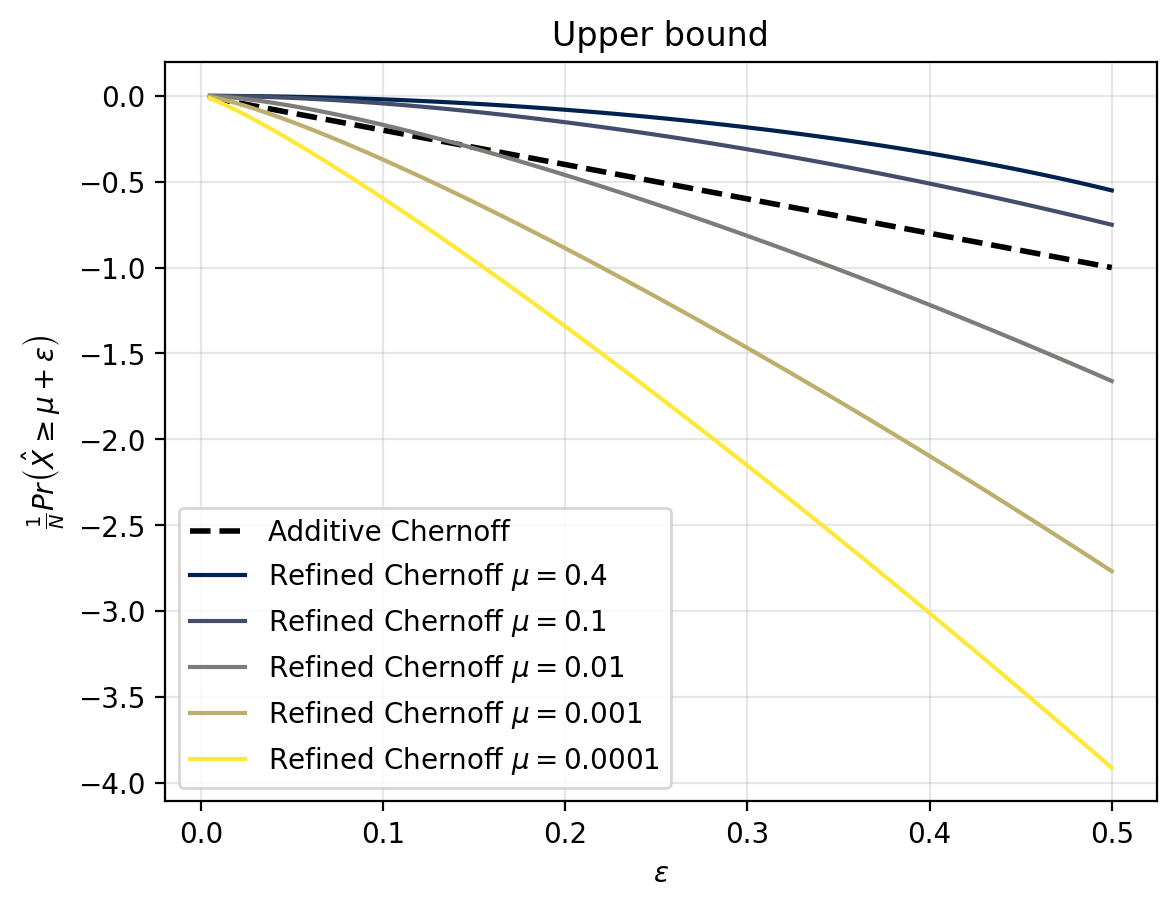

In [67]:
plt.plot(eps_values, hoeff1, label="Additive Chernoff", c="black", linestyle="--", linewidth=2)

mu_values = [0.4, 0.1, 0.01, 0.001, 0.0001]
colors = plt.cm.cividis(np.linspace(0, 1, len(mu_values)))
for mu, color in zip(mu_values, colors):
    hoeff2 = - klb(eps_values + mu, mu)
    plt.plot(eps_values, hoeff2, label=f"Refined Chernoff $\mu=${mu}", color=color)
    
title = "Upper bound"
plt.title(title)
plt.ylabel(r"$\frac{1}{N}{Pr}\left(\hat X \geq \mu + \epsilon\right)$")
plt.legend()
plt.xlabel(r"$\epsilon$")
plt.grid(alpha=0.3)